# WE RATE DOGS - Data Wrangling

## TABLE OF CONTENTS
- [Introduction](#intro)
- [Gathering](#gather)
- [Assessing](#assess)
- [Cleaning](#clean)
- [Storing](#store)
- [Analysing](#analyse)

<a id = 'intro'></a>

## INTRODUCTION
Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.

Here, with documenting my wrangling efforts, I will also showcase them through analyses and visualizations using Python (and its libraries).

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has received international media coverage.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import os

<a id = 'gather'></a>
## GATHERING
Here, we will gather 3 pieces of data as described below:
1. The WeRateDogs Twitter archive: This file was given by Udacity directly in the downloadable format through this [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)


2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.This file `image_predictions.tsv` is hosted on Udacity's servers and should be downloaded programmatically using the **Requests** library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


3. Each tweet's retweet count and favorite ("like") count. Using the tweet IDs in the WeRateDogs Twitter archive, we will query the Twitter API for each tweet's JSON data using Python's **Tweepy** library and store each tweet's entire set of JSON data in a file called `tweet_json.txt file`. Each tweet's JSON data should be written to its own line. Then we will read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.

In [2]:
# Import necessary libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

**1. Load in the WeRateDogs Twitter archive**

In [2]:
#Read in the We Rate Dogs Twitter Archive
arch_twt = pd.read_csv('twitter-archive-enhanced.csv')
arch_twt.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2. Programatically download `image_predictions.tsv`**

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [3]:
# Load the `image_predictions.tsv`
img_pred = pd.read_csv('image-predictions.tsv' , sep='\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Read `tweet_json.txt` line by line into a dataframe with tweet ID, retweet count, and favorite count.**

In [4]:
with open('tweet_json.txt', encoding='utf-8') as file:
    print(len(file.readlines()))

2354


In [5]:
# Try to form a list by appending the extracted data from each line of the `tweet_json.txt`
df_list_try =[]
with open('tweet_json.txt', encoding='utf-8') as file:
    for x in range(2354):
        x = file.readline()
        data = {}
        y = x.strip('{').strip('}').split(',')
        for item in y:
            if ':' in item:
                key, value = item.split(':', 1)
                data[key] = value
            else:
                pass
        favorite_count = data[' "favorite_count"']
        retweet_count = data[' "retweet_count"']
        id_dog = data[' "id"']
        df_list_try.append({'favorite_count':int(favorite_count),
                      'retweet_count':int(retweet_count),
                      'tweet_id':id_dog})
df_list_try

[{'favorite_count': 39467,
  'retweet_count': 8853,
  'tweet_id': ' 892420643555336193'},
 {'favorite_count': 33819,
  'retweet_count': 6514,
  'tweet_id': ' 892177421306343426'},
 {'favorite_count': 25461,
  'retweet_count': 4328,
  'tweet_id': ' 891815181378084864'},
 {'favorite_count': 42908,
  'retweet_count': 8964,
  'tweet_id': ' 891689557279858688'},
 {'favorite_count': 41048,
  'retweet_count': 9774,
  'tweet_id': ' 891327558926688256'},
 {'favorite_count': 20562,
  'retweet_count': 3261,
  'tweet_id': ' 891087950875897856'},
 {'favorite_count': 12041,
  'retweet_count': 2158,
  'tweet_id': ' 890971913173991426'},
 {'favorite_count': 56848,
  'retweet_count': 16716,
  'tweet_id': ' 890729181411237888'},
 {'favorite_count': 28226,
  'retweet_count': 4429,
  'tweet_id': ' 890609185150312448'},
 {'favorite_count': 32467,
  'retweet_count': 7711,
  'tweet_id': ' 890240255349198849'},
 {'favorite_count': 31166,
  'retweet_count': 7624,
  'tweet_id': ' 890006608113172480'},
 {'favori

Looks like this method didn't work for all the observations. There are some observations wrongly interpreted. To resolve this we need to load whole file line by line into a datframe and then seperate the desired contents

In [6]:
# Create an empty list to load data line by line into it
df_list = []
with open('tweet_json.txt', 'r', encoding='utf-8') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append(data)

In [7]:
# Convert the list to a dataframe and seperate out the variables of interest
df = pd.DataFrame(df_list, columns = df_list[0].keys())
tweet_count = df[['id', 'retweet_count', 'favorite_count']]

In [8]:
# Check if the dataframe is correctly extracted
tweet_count.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id = 'assess'></a>
## ASSESSING

After Gathering, this is the second step. Here, we will assess the above gathered data visually and programatically for quality and tidiness issues. All the issues will be documented at the end because the issues will be detected and noted simultaneously after assessing the cell as we progress, so that we don't miss out on any issue to resolve and will be written at one place for easy access. Therefore the content will automatically reach at the end. We will look out for following types of issues:

**Quality:** Issues with the content. Low quality data is also known as dirty data.

**Tidiness:** Issues with the structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:

**a. Each variable forms a column.**

**b. Each observation forms a row.**

**c. Each type of observational unit forms a table.**

...using two types of assessment:

**1. Visual assessment:** Scrolling through the data in your Jupyter Notebook

**2. Programmatic assessment:** Using code to view the specific portions and summaries of the data

## 1. Visual Assessment

In [10]:
# Visually assess arch_twt
arch_twt

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# Visually assess img_pred
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
# Visually assess tweet_count
tweet_count

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## 2. Programattic Assessment
### 2. (a) arch_twt :

In [13]:
# Check the detailed information of arch_twt
arch_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Check the last 5 rows of arch_twt
arch_twt.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
# Check the observations where expanded_urls is NaN
arch_twt[arch_twt.expanded_urls.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [16]:
# Check if there are any erroneous datatypes
arch_twt.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [17]:
# Check the descriptive statistics for outliers and unusual stats
arch_twt.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**Rating numerator and rating denominator seems to have unusual maxima and minima. So, let's check them first**

In [18]:
# Check the observation where rating numerator is maximum
arch_twt[arch_twt.rating_numerator == arch_twt.rating_numerator.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [19]:
# Check the observation where rating denominator is maximum
arch_twt[arch_twt.rating_denominator == arch_twt.rating_denominator.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [20]:
# Check the observations where rating numerator is greater than 20
arch_twt[arch_twt.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [21]:
# Check the observations where rating denominator is other than 10
arch_twt[(arch_twt.rating_denominator > 10)|(arch_twt.rating_denominator < 10) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


**We must check whether the numerator values have been incorrectly entered due to wrong extraction of decimal values from the text**

In [14]:
# Check the numerator values where they have been incorrectly entered
pd.set_option('display.max_colwidth', 500)
arch_twt[arch_twt.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


**Now, let's continue assessing further**

In [22]:
# Take the sample of 50 observations to get an overall idea
arch_twt.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1755,678774928607469569,NaN,NaN,2015-12-21 03:12:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tug. He's not required to wear the con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678774928...,11,10,Tug,None,None,None,None
366,828801551087042563,NaN,NaN,2017-02-07 03:04:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gus. He likes to be clo...,8.102541e+17,4.196984e+09,2016-12-17 22:43:27 +0000,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None
866,762035686371364864,NaN,NaN,2016-08-06 21:20:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This left me speechless. 14/10 heckin heroic a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762035686...,14,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,None,None,None,None,None
2035,671735591348891648,NaN,NaN,2015-12-01 17:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,None,None,None,None
1070,740359016048689152,NaN,NaN,2016-06-08 01:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chase. He's in a predicament. 9/10 hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740359016...,9,10,Chase,None,None,None,None
1013,747219827526344708,NaN,NaN,2016-06-27 00:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,None,None,None,None
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,None,None,None,None
39,884876753390489601,NaN,NaN,2017-07-11 20:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. It's her first time outside. Mus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884876753...,13,10,Lola,None,None,None,None


In [23]:
# Check if there are any duplicated tweet ids
arch_twt[arch_twt.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
# Check the individual value counts for each value of source column
arch_twt.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
# Check those observations where retweeted_status_id or retweeted_status_user_id are not null
arch_twt[(arch_twt.retweeted_status_id.isnull() == False) | (arch_twt.retweeted_status_user_id.isnull() == False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [26]:
# Check those observations where in_reply_to_status_id or in_reply_to_user_id are not null
arch_twt[(arch_twt.in_reply_to_status_id.isnull() == False) | (arch_twt.in_reply_to_user_id.isnull() == False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


### 2. (b) img_pred:

In [27]:
# Check the detailed information of img_pred table
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
# Check the descriptive statistics of img_pred for any outliers and unusual stats
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
# Check the distribution of img_num values
img_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
# Check the observations where p1_conf = 1
img_pred[(img_pred.p1_conf == 1.0)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [31]:
# Take the sample of 50 observations to get an overall idea
img_pred.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
840,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,beaver,0.457094,False,mongoose,0.228298,False,marmot,0.148309,False
1618,802572683846291456,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1,golden_retriever,0.610171,True,Labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True
880,698635131305795584,https://pbs.twimg.com/ext_tw_video_thumb/69863...,1,Samoyed,0.158464,True,kuvasz,0.089402,True,West_Highland_white_terrier,0.025037,True
1818,834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False
1380,765222098633691136,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
499,675822767435051008,https://pbs.twimg.com/media/CWEBOFYWwAA-O2c.jpg,1,Pomeranian,0.460710,True,chow,0.202765,True,Pekinese,0.133266,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1685,814530161257443328,https://pbs.twimg.com/media/C03K2-VWIAAK1iV.jpg,1,miniature_poodle,0.626913,True,toy_poodle,0.265582,True,soft-coated_wheaten_terrier,0.041614,True
1925,857393404942143489,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,3,malamute,0.841597,True,Siberian_husky,0.073644,True,Eskimo_dog,0.072129,True


In [32]:
# Check if there are any duplicated tweet ids
img_pred[img_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
# Check if there are any duplicated jpg_url
img_pred[img_pred.jpg_url.duplicated()].jpg_url.values

array(['https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg',
       'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg',
       'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg',
       'https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg',
       'https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg',
       'https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg',
       'https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg',
       'https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg',
       'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg',
       'https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg',
       'https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg',
       'https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg',
       'https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg',
       'https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg',
       'https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg',
       'https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg',
       'https://pbs.

**Looks like there are quite many jpg urls that are duplicated. It would have been useful to include them if there would have been multiple tweets related to one image. But since, this table is about image predictions, there is no need of duplicate images** 

In [34]:
# Check fr all the duplicates of jpg_url
img_pred[img_pred.jpg_url.apply(lambda x: x in img_pred[img_pred.jpg_url.duplicated()].jpg_url.values)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


### 2. (c) tweet_count table :

In [35]:
# Check the detailed info of tweet_count
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [36]:
# Check the descriptive statistics of tweet_count for any outliers and unusual stats
tweet_count.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [37]:
# Check for the duplicate observations
tweet_count[tweet_count.duplicated() == True]

,id,retweet_count,favorite_count


In [38]:
# Check if there are any duplicate ids
tweet_count[tweet_count.id.duplicated()]

,id,retweet_count,favorite_count


In [39]:
# Check for the instances where retweet_count and favorite_count are duplicated together
tweet_count[(tweet_count.retweet_count.duplicated()) & (tweet_count.favorite_count.duplicated())]

,id,retweet_count,favorite_count
444,819227688460238848,7733,25652
487,813944609378369540,3732,0
715,783821107061198850,2269,8209
740,780496263422808064,4319,0
812,771102124360998913,1663,6898
827,768909767477751808,3129,0
845,766078092750233600,2970,0
860,762699858130116608,4190,13518
883,760153949710192640,38,0
914,756998049151549440,2271,6923


**Below, I have mentioned all the Quality and Tidiness issues**

## Quality
### arch_twt table - Twitter's archive
- There are many columns with missing values namely - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- name, doggo, floofer, pupper and puppo columns have value with the name `None`
- Values in `source` column are not human readable
- Some names in the `name` column are invalid data like `such`, `quite`, `a`, `an`
- Erroneous data types - `timestamp` & `retweeted_status_timestamp` column(also needs to be split into two date and time); `dog_stage` column(should be categorical); `tweet_id`, `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id` columns(should be str)
- `rating_denominator` is other than assumed standard value of `10` at some places which can be Inaccurate data
- `rating_numerator` column has some exceptionally high values which leads to exceptionally high rating which can be inaccurate
- There are 6 instances of incorrectly entered `rating_numerator` values
- There are some tweets which are retweets to `@dog_rates` which is the twitter handle for `We Rate Dogs`

### img_pred table - Image predictions
- Use of `_` instead of `space` in p1, p2 and p3 column values. Also, values upper case sometimes lowercase other times in p1, p2 and p3 columns
- column names are not clearly descriptive
- There are image duplicate predictions present for duplicate `jpg_url` with different tweet ids and rest all the data same.

### tweet_count - retweet count and favorite count
- tweet id title is different, `id` here `tweet_id` in others.
- Both `retweet_count` and `favorite_count` values are duplicated in some rows(doubtful)

## Tidiness
### arch_twt table - Twitter's archive
- One variable in 4 columns - dog_stage(doggo, floofer, pupper, puppo)
- Merge the tables - `arch_twt` and `tweet_count`

<a id = 'clean'></a>
## CLEANING

**Cleaning** your data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step. Here, we'll resolve all of the issues mentioned above, one at a time

We will work through the cleaning process through three steps:

1. **Define:** We will convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or we in the future) can look at our work and reproduce it.
2. **Code:** We will convert those definitions to code and run that code.
3. **Test:** We will test our dataset, visually or with code, to make sure our cleaning operations worked.

I will follow the following plan for this section so that we don't need to use the repetitive codes in the future:

**1. Missing Data**

**2. Tidiness Issues** 

**3. Other Quality Issues**

Let's take down the issues one by one

## Missing Data

In [53]:
# Create copies of the above three dataframes
tweet_data_clean = arch_twt.copy()
img_pred_clean = img_pred.copy()
tweet_count_clean = tweet_count.copy()

**1. There are many columns with missing values namely - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls**

**Define** : Remove the unnecessary columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_timestamp` and `retweeted_status_user_id`; fill the missing values of `expanded_urls` column in `tweet_data_clean` table using tweet_id as tweet id is the last part of the tweet URL after "status/"

**Code**

In [54]:
# Drop the unnecessary columns
tweet_data_clean = tweet_data_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id'], axis=1)

In [55]:
# Fill the missing values
tweet_data_clean.expanded_urls = 'https://twitter.com/dog_rates/status/' + tweet_data_clean.tweet_id.astype(str) 

In [56]:
# Drop retweeted_status_timestamp
tweet_data_clean = tweet_data_clean.drop('retweeted_status_timestamp', axis=1)

**Test**

In [57]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2356 non-null int64
timestamp              2356 non-null object
source                 2356 non-null object
text                   2356 non-null object
retweeted_status_id    181 non-null float64
expanded_urls          2356 non-null object
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
doggo                  2356 non-null object
floofer                2356 non-null object
pupper                 2356 non-null object
puppo                  2356 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


In [58]:
tweet_data_clean[tweet_data_clean.expanded_urls.isnull() == True]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Tidiness Issues

**2. One variable in 4 columns - dog_stage(doggo, floofer, pupper, puppo)**

**Define** : Combine the `doggo`, `floofer`, `pupper`, `puppo` columns into one column `dog_status` and drop the unnecessary columns after formation of `dog_status`

**Code**

In [59]:
# Replace the NaNs with empty string
tweet_data_clean[['doggo', 'floofer', 'pupper', 'puppo']] = tweet_data_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

In [60]:
# Combine the columns into one column
tweet_data_clean['dog_stage'] = tweet_data_clean['doggo'] + tweet_data_clean['floofer'] + tweet_data_clean['pupper'] + tweet_data_clean['puppo']

In [61]:
# Drop unnecessary columns
tweet_data_clean = tweet_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [62]:
tweet_data_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [63]:
tweet_data_clean.dog_stage = tweet_data_clean.dog_stage.replace('doggopupper', 'multiple')
tweet_data_clean.dog_stage = tweet_data_clean.dog_stage.replace('doggopuppo', 'multiple')
tweet_data_clean.dog_stage = tweet_data_clean.dog_stage.replace('doggofloofer', 'multiple')

**Test**

In [64]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id               2356 non-null int64
timestamp              2356 non-null object
source                 2356 non-null object
text                   2356 non-null object
retweeted_status_id    181 non-null float64
expanded_urls          2356 non-null object
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
dog_stage              2356 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 184.1+ KB


In [65]:
tweet_data_clean.dog_stage.value_counts()

            1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_stage, dtype: int64

**3. tweet id title is different, id here tweet_id in others.**

**Define** : Rename the `id` column in `tweet_count_clean` to `tweet_id`

**Code**

In [66]:
tweet_count_clean = tweet_count_clean.rename(columns = {'id': 'tweet_id'})

**Test**

In [67]:
list(tweet_count_clean)

['tweet_id', 'retweet_count', 'favorite_count']

**4. Merge the tables - arch_twt and tweet_count**

**Define** : Merge the tables `tweet_data_clean` and `tweet_count_clean` on `tweet_id` column

**Code**

In [68]:
tweet_data_clean = pd.merge(tweet_data_clean, tweet_count_clean, on = 'tweet_id', how = 'inner')

**Test**

In [69]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 12 columns):
tweet_id               2354 non-null int64
timestamp              2354 non-null object
source                 2354 non-null object
text                   2354 non-null object
retweeted_status_id    179 non-null float64
expanded_urls          2354 non-null object
rating_numerator       2354 non-null int64
rating_denominator     2354 non-null int64
name                   2354 non-null object
dog_stage              2354 non-null object
retweet_count          2354 non-null int64
favorite_count         2354 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 239.1+ KB


## Quality Issues

### tweet_data_clean table:

**5. Erroneous data types - `timestamp` & `retweeted_status_timestamp` column(also needs to be split into two date and time); `dog_stage` column(should be categorical); `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` columns(should be str)**

**6. There are some tweets which are retweets to `@dog_rates` which is the twitter handle for `We Rate Dogs`**

**Define** : Change the datatype of `timestamp` to datetime and remove the observations where `tweet_id` matches `retweeted_status_id`

**Code**

In [70]:
# Convert timestamp datatype to datetime
tweet_data_clean.timestamp = pd.to_datetime(tweet_data_clean.timestamp)

In [71]:
# Seperate out the series of retweeted_status_id to match later
retweet_clean = tweet_data_clean.retweeted_status_id

retweet_clean = retweet_clean.dropna()

retweet_clean = retweet_clean.astype('int64')

In [72]:
# Drop the observations where tweet_id matches the above seperated series
tweet_data_clean = tweet_data_clean.drop(tweet_data_clean[tweet_data_clean.tweet_id.apply(lambda x : x in retweet_clean.values)].index.values, axis=0)



In [73]:
tweet_data_clean = tweet_data_clean.drop('retweeted_status_id', axis=1)

**Test**

In [74]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2242 non-null int64
timestamp             2242 non-null datetime64[ns, UTC]
source                2242 non-null object
text                  2242 non-null object
expanded_urls         2242 non-null object
rating_numerator      2242 non-null int64
rating_denominator    2242 non-null int64
name                  2242 non-null object
dog_stage             2242 non-null object
retweet_count         2242 non-null int64
favorite_count        2242 non-null int64
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 210.2+ KB


**7. rating_denominator is other than assumed standard value of 10 at some places which can be Inaccurate data and there are 6 instances of incorrectly entered `rating_numerator` values**

**Note** : `rating_denominator` value needs to be standardized to a standard value of 10 which is the standard for `WeRateDogs` too for a better and justified analysis

**Define** : Correct/Clean the observations with incorrect denominator rating and change the denominator rating to 10. Also change the numerator rating according and equivalent to denominator rating. 

**Code:**

In [75]:
# Check for the instances where rating_denominator is other than 10
pd.set_option('display.max_colwidth', 200)
tweet_data_clean[['text','expanded_urls', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10')

,text,expanded_urls,rating_numerator,rating_denominator
312,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",https://twitter.com/dog_rates/status/835246439529840640,960,0
341,@docmisterio account started on 11/15/15,https://twitter.com/dog_rates/status/832088576586297345,11,15
432,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,https://twitter.com/dog_rates/status/820690176645140481,84,70
515,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,https://twitter.com/dog_rates/status/810984652412424192,24,7
783,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",https://twitter.com/dog_rates/status/775096608509886464,9,11
900,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024,165,150
1066,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",https://twitter.com/dog_rates/status/740373189193256964,9,11
1118,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288,204,170
1163,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656,4,20
1200,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801,50,50


In [76]:
# Check the numerator values where they have been incorrectly entered
pd.set_option('display.max_colwidth', 500)
tweet_data_clean[tweet_data_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator,rating_denominator
44,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
339,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
762,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1687,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1710,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [77]:
# Replace the incorrect ratings with correct ratings
tweet_data_clean[['rating_numerator', 'rating_denominator']] = tweet_data_clean[['rating_numerator', 'rating_denominator']].replace([960 ,0], [13, 10])

**Note**: The above method won't work with other rows because the rows that need correction in either numerator or denominator values will affect all other rows in the same column where values are already correct and therfore it will disturb the whole ranking column. 

So, here we will use `loc` method to affect only a specific slice/part of a data frame 

In [78]:
# Replace the incorrect ratings with correct ratings
tweet_data_clean.loc[783, 'rating_numerator':'rating_denominator'] = [14, 10]

tweet_data_clean.loc[1066, 'rating_numerator':'rating_denominator'] = [14, 10]

tweet_data_clean.loc[1163, 'rating_numerator':'rating_denominator'] = [13, 10]

tweet_data_clean.loc[1200, 'rating_numerator':'rating_denominator'] = [11, 10]

tweet_data_clean.loc[1596, 'rating_numerator':'rating_denominator'] = [13, 10]

tweet_data_clean.loc[1660, 'rating_numerator':'rating_denominator'] = [10, 10]

tweet_data_clean.loc[2333, 'rating_numerator':'rating_denominator'] = [9, 10]

tweet_data_clean.loc[44, 'rating_numerator':'rating_denominator'] = [13.50, 10]

tweet_data_clean.loc[339, 'rating_numerator':'rating_denominator'] = [9.75, 10]

tweet_data_clean.loc[762, 'rating_numerator':'rating_denominator'] = [11.27, 10]

tweet_data_clean.loc[1687, 'rating_numerator':'rating_denominator'] = [9.50, 10]

tweet_data_clean.loc[1710, 'rating_numerator':'rating_denominator'] = [11.26, 10]

In [79]:
# Drop the other wrongly entered ratings
tweet_data_clean = tweet_data_clean.drop([341, 515, 783, 1596, 1661], axis = 0)

In [80]:
# Check the datatype of each variable
tweet_data_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                  int64
name                               object
dog_stage                          object
retweet_count                       int64
favorite_count                      int64
dtype: object

In [81]:
# Create a rating_factor column 
tweet_data_clean['rating_factor'] = tweet_data_clean.rating_denominator/10

# Change the rating_denominator to 10 and rating_numerator equivalent to 10 using rating_factor variable
tweet_data_clean.rating_denominator = (tweet_data_clean.rating_denominator/tweet_data_clean['rating_factor']).astype('int64')
tweet_data_clean.rating_numerator = (tweet_data_clean.rating_numerator/tweet_data_clean['rating_factor'])

In [82]:
# Drop the rating_factor
tweet_data_clean.drop('rating_factor', axis=1, inplace=True)

**Test**

In [83]:
tweet_data_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [84]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2237 non-null int64
timestamp             2237 non-null datetime64[ns, UTC]
source                2237 non-null object
text                  2237 non-null object
expanded_urls         2237 non-null object
rating_numerator      2237 non-null float64
rating_denominator    2237 non-null int64
name                  2237 non-null object
dog_stage             2237 non-null object
retweet_count         2237 non-null int64
favorite_count        2237 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 209.7+ KB


**8. Some names in the `name` column are invalid data like `such`, `quite`, `a`, `an`**

**Define** : Check and replace all the instances of name column having invalid data with NaN

**Code**:

In [85]:
# Check for invalid names
tweet_data_clean[tweet_data_clean.name.str.islower() == True].name.value_counts()

a               55
the              8
an               6
very             5
one              4
just             3
quite            3
actually         2
not              2
getting          2
mad              1
old              1
light            1
space            1
incredibly       1
my               1
such             1
unacceptable     1
his              1
this             1
life             1
infuriating      1
by               1
all              1
officially       1
Name: name, dtype: int64

In [86]:
# Replace the invalid names with a string 'None'
for item in tweet_data_clean.name:
    if item.islower() == True:
        tweet_data_clean.name = tweet_data_clean.name.replace(item, 'None')

In [87]:
# Replace 'None' string in the name column with NaN value
tweet_data_clean.name = tweet_data_clean.name.replace('None', np.nan)

**Test**

In [88]:
tweet_data_clean[tweet_data_clean.name.str.islower() == True].name

Series([], Name: name, dtype: object)

In [89]:
sum(tweet_data_clean.name.isnull())

810

**9. name, doggo, floofer, pupper and puppo columns have value with the name None**

**Note**: `doggo`, `floofer`, `pupper` and `puppo` columns have been converted to one column `dog_stage` and `dog_stage` has many incorrectly entered data in addition to the data with None names. So, we need to correctly reform the whole column again. 

**Define**: Check for the correct words in the `text` column to correctly interpret the `dog_stage` and then reform the `dog_stage` using these words

**Code**:

In [90]:
# Check the distribution of each value in the dog_stage
tweet_data_clean.dog_stage.value_counts()

            1883
pupper       230
doggo         79
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

In [91]:
# Take the sample of the data with text and dog_stage variables to get an overall idea
pd.set_option('display.max_colwidth', 200)
tweet_data_clean[['text', 'dog_stage']].sample(50)

,text,dog_stage
777,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",multiple
541,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,
16,This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both https://t.co/chxruIOUJN,
2023,This is Batdog. He's sleeping now but when he wakes up he'll fight crime and such. Great tongue. 11/10 for Batdog https://t.co/Clg16EVy9O,
212,Oh jeez u did me quite the spook little fella. We normally don't rate triceratops but this one seems suspiciously good. 11/10 would pet well https://t.co/BMtfCmNbnS,
489,"Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg",
1559,This is Louis. He's takes top-notch selfies. 12/10 would snapchat with https://t.co/vz2DukO0th,
1567,Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy,
1951,This is Kendall. 12/10 would cuddle the hell out of https://t.co/fJulMurnfj,
2260,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,


In [92]:
# Collect the correct words for dog_stage interpretation in 4 variables for seperating 4 different dog_stages 
dog_pupper = ['Pup', 'pup', 'pups', 'puppers', 'pupper', 'Pupper', 'puppeters', 'puppy', 'Puppy', 'Pup.', 'pup.', 'pups.', 'puppers.', 'pupper.', 'Pupper.', 'puppeters.', 'puppy.', 'Puppy.', 'pupper,', 'pupper?', '(pupper)', 'PUPPER', '(pupper).']
dog_doggo = ['Doggo', 'doggo', 'dogg', 'Doggo.', 'doggo.', 'dogg.', 'doggo?', '(doggo)', 'DOGGO', '(doggo),']
dog_puppo = ['puppo', 'Puppo', 'puppo.', 'Puppo.', 'puppo?']
dog_floofer = ['Floofer', 'floofs', 'floofer', 'floofers', 'floof', 'Floofy', 'floofy', 'floofs.', 'floofer.', 'floofers.', 'floof.', 'Floofy.', 'floofy.', 'Floofer.']

In [93]:
# Form a new column to test
tweet_data_clean['dog_stage_2'] = ''

In [94]:
# Use the above 4 variables to correctly interpret dog stage in the new column
for item in tweet_data_clean.text:
    y = tweet_data_clean[tweet_data_clean.text == item].index.values
    x = str(item).strip(".,").split(' ')
    for word in x:
        if (word in dog_pupper) and (word in dog_doggo):
            tweet_data_clean.loc[y, 'dog_stage_2'] = 'pupper & doggo'
        elif (word in dog_puppo) and (word in dog_doggo):
            tweet_data_clean.loc[y, 'dog_stage_2'] = 'puppo & doggo'
        elif (word in dog_floofer) and (word in dog_doggo):
            tweet_data_clean.loc[y, 'dog_stage_2'] = 'floofer & doggo'
        elif word in dog_pupper:
            tweet_data_clean.loc[y, 'dog_stage_2'] = 'pupper'
        elif word in dog_doggo:
            tweet_data_clean.loc[y, 'dog_stage_2'] = 'doggo'
        elif word in dog_puppo:
            tweet_data_clean.loc[y, 'dog_stage_2'] = 'puppo'
        elif word in dog_floofer:
            tweet_data_clean.loc[y, 'dog_stage_2'] = 'floofer'

In [95]:
# Replace the dog_stage column with the new column values
tweet_data_clean.dog_stage = tweet_data_clean.dog_stage_2

In [96]:
# Drop the new column and replace instances of empty string with NaN
tweet_data_clean.dog_stage = tweet_data_clean.dog_stage.replace('', np.nan)
tweet_data_clean.drop('dog_stage_2', axis=1, inplace=True)

**Test**

In [97]:
tweet_data_clean.dog_stage.value_counts()

pupper     413
doggo       79
puppo       23
floofer     20
Name: dog_stage, dtype: int64

In [98]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2237 non-null int64
timestamp             2237 non-null datetime64[ns, UTC]
source                2237 non-null object
text                  2237 non-null object
expanded_urls         2237 non-null object
rating_numerator      2237 non-null float64
rating_denominator    2237 non-null int64
name                  1427 non-null object
dog_stage             535 non-null object
retweet_count         2237 non-null int64
favorite_count        2237 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 289.7+ KB


**10. Values in source column are not human readable**

**Define**: Replace the values in `source` column with human readable text

**Code**:

In [99]:
# Check the distribution of source values 
tweet_data_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2116
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          80
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [100]:
# Replace the values in the source column with human readable text
tweet_data_clean.source = tweet_data_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tweet_data_clean.source = tweet_data_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
tweet_data_clean.source = tweet_data_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tweet_data_clean.source = tweet_data_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

**Test**

In [101]:
tweet_data_clean.source.value_counts()

Twitter for iPhone     2116
Vine - Make a Scene      80
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

## img_pred_clean table:

**11. Use of _ instead of space in p1, p2 and p3 column values. Also, values upper case sometimes lowercase other times in p1, p2 and p3 columns**

**Define**: Replace the instance of `_` with ` ` and change the values to upper case in `p1, p2 and p3`

**Code**:

In [102]:
img_pred_clean.p1 = img_pred_clean.p1.str.replace('_', ' ').str.capitalize()
img_pred_clean.p2 = img_pred_clean.p2.str.replace('_', ' ').str.capitalize()
img_pred_clean.p3 = img_pred_clean.p3.str.replace('_', ' ').str.capitalize()

**Test**

In [103]:
img_pred_clean[['p1', 'p2', 'p3']].sample(50)

,p1,p2,p3
1759,Great pyrenees,Golden retriever,English setter
299,German shepherd,Kelpie,Red wolf
1499,Lakeland terrier,Golden retriever,Standard poodle
1987,Cocker spaniel,Sussex spaniel,Standard poodle
802,Shetland sheepdog,Collie,Border collie
790,Bighorn,Hyena,Mexican hairless
1516,Golden retriever,Saluki,Labrador retriever
124,Chow,Minivan,Pekinese
795,Geyser,Seashore,Beacon
934,Golden retriever,Standard poodle,Tibetan mastiff


**12. column names are not clearly descriptive**

**Define**: Rename the columns with descriptive names

**Code**:

In [104]:
img_pred_clean = img_pred_clean.rename(columns = {'jpg_url':'image_url', 'img_num':'image_number', 'p1':'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction', 'p1_conf':'first_prediction_confidence', 'p2_conf':'second_prediction_confidence', 'p3_conf':'third_prediction_confidence', 'p1_dog':'first_prediction_dog', 'p2_dog':'second_prediction_dog', 'p3_dog':'third_prediction_dog'})

**Test**

In [105]:
list(img_pred_clean)

['tweet_id',
 'image_url',
 'image_number',
 'first_prediction',
 'first_prediction_confidence',
 'first_prediction_dog',
 'second_prediction',
 'second_prediction_confidence',
 'second_prediction_dog',
 'third_prediction',
 'third_prediction_confidence',
 'third_prediction_dog']

**13. There are image duplicate predictions present for duplicate jpg_url with different tweet ids and rest all the data same.**

**Define**: Drop the observations where `image_url` is duplicated

**Code**:

In [106]:
img_pred_clean = img_pred_clean.drop_duplicates(['image_url'])

**Test**

In [107]:
img_pred_clean[img_pred_clean.image_url.duplicated()]

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog


In [108]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2009 non-null int64
image_url                       2009 non-null object
image_number                    2009 non-null int64
first_prediction                2009 non-null object
first_prediction_confidence     2009 non-null float64
first_prediction_dog            2009 non-null bool
second_prediction               2009 non-null object
second_prediction_confidence    2009 non-null float64
second_prediction_dog           2009 non-null bool
third_prediction                2009 non-null object
third_prediction_confidence     2009 non-null float64
third_prediction_dog            2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


<a id = 'store'></a>
## STORING THE DATA
This is the next important step after cleaning i.e. to store the cleaned datasets. Store the `tweet_data_clean` and `img_pred_clean` into two seperate .csv files.

### 1. Storing `tweet_data_clean`

In [109]:
tweet_data_master = pd.merge(tweet_data_clean, img_pred_clean, on = 'tweet_id', how = 'inner')

In [110]:
tweet_data_master.to_csv('twitter_archive_master.csv')

### 2. Storing `img_pred_clean`

In [111]:
img_pred_clean.to_csv('image_predictions_master.csv')

<a id = 'analyse'></a>
## ANALYSING THE DATA

Now, here, I am analyzing the data on 3 different questions of interest

### 1. Comparison Of Average Number Of Retweets And Favorites In A Month

In [112]:
# Create a subset of the tweet_data_clean with the required variables
tweets_month = tweet_data_clean[['tweet_id', 'timestamp', 'retweet_count', 'favorite_count']]

In [113]:
# Create a months column using timestamp variable
tweets_month['month'] = tweet_data_clean['timestamp'].dt.month 

C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
# Check if the above methods are applied correctly
tweets_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2237 non-null int64
timestamp         2237 non-null datetime64[ns, UTC]
retweet_count     2237 non-null int64
favorite_count    2237 non-null int64
month             2237 non-null int64
dtypes: datetime64[ns, UTC](1), int64(4)
memory usage: 184.9 KB


In [115]:
# Import the necessary libraries for creating the visuals
import seaborn as sb
import matplotlib.pyplot as plt

#
% matplotlib inline

UsageError: Line magic function `%` not found.


In [116]:
# Create a variable for storing mean of retweet counts grouped by month
avg_retweets = tweets_month.sort_values('month').groupby('month').retweet_count.mean().astype(int)

In [117]:
# Create a variable for storing mean of favorite counts grouped by month
avg_favorites = tweets_month.sort_values('month').groupby('month').favorite_count.mean().astype(int)

In [118]:
# Define the locations and width for the bar graphs
index = np.arange(len(avg_retweets))
width = 0.4

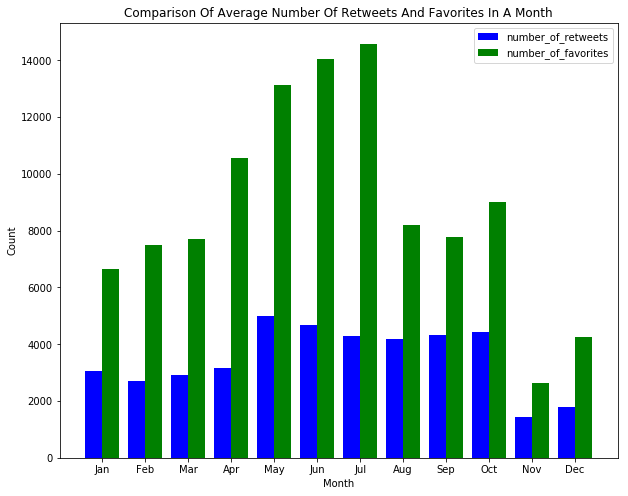

In [119]:
# two bar graphs settled in one
plt.figure(figsize = (10, 8))
retweet_bars = plt.bar(index, avg_retweets, width, alpha = 1, color = 'b', label = 'number_of_retweets')
favorite_bars = plt.bar(index+width, avg_favorites, width, alpha = 1, color = 'g', label = 'number_of_favorites')

# title and labels
plt.title('Comparison Of Average Number Of Retweets And Favorites In A Month')
plt.xlabel('Month')
plt.ylabel('Count')
locations = index + (width/2)
x_axis_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(locations, x_axis_labels)

# Legend
plt.legend()

**Observations:**
1. As we can see that on an average, number of favorites are quite higher than number of retweets.
2. July has the highest average number of favorites and November has the lowest average number of favorites.
3. May has the highest average number of retweets and November has the lowest average number of retweets.
4. June has the second highest both average number of favorites and retweets.

### 2. Comparison Of Average Rating Of Dog Stages

In [120]:
# Create a subset of the tweet_data_clean with the required variables
rating_dog = tweet_data_clean[['tweet_id', 'rating_numerator', 'rating_denominator', 'dog_stage']].copy()

In [121]:
# Create a variable and store dog_stage value counts
dog_count = rating_dog.groupby('dog_stage').dog_stage.count()
dog_count

dog_stage
doggo       79
floofer     20
pupper     413
puppo       23
Name: dog_stage, dtype: int64

In [122]:
# Create a variable and store the average rating numerator for each dog stage
avg_rating = rating_dog.groupby('dog_stage').rating_numerator.mean()
avg_rating

dog_stage
doggo      22.367089
floofer    11.500000
pupper     10.366901
puppo      12.000000
Name: rating_numerator, dtype: float64

In [123]:
avg_rating.index.values

array(['doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [124]:
# Create a function for calculating percentages and labelling different sections of a pie chart
def func(pct, dog_count):
    absolute = int(pct/100.*np.sum(dog_count))
    return "{:.2f}%\n({:d})".format(pct, absolute)

Text(0, 0.5, 'Rating(out of 10)')

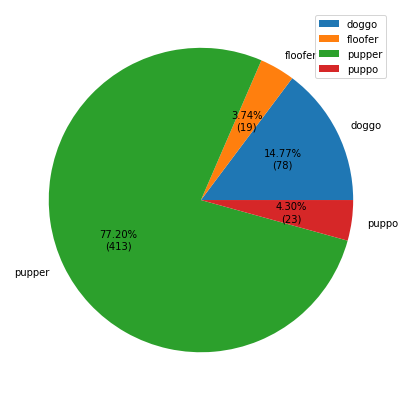

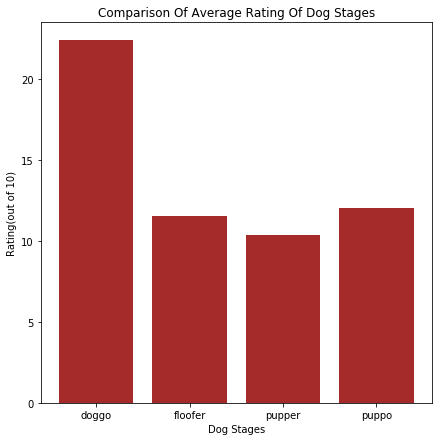

In [125]:
# Plot a pie chart with legend for showing percentage of dogs belonging to different dog stages
plt.figure(figsize = (7, 7))
plt.pie(dog_count, labels = avg_rating.index.values, autopct = lambda pct: func(pct, dog_count))
plt.legend()

# Plot a bar chart with title, xlabel and ylabel for comparison of average rating Of dog stages
plt.figure(figsize = (7, 7))
plt.bar(avg_rating.index.values, avg_rating, 0.8, color = 'brown', alpha = 1)
plt.title('Comparison Of Average Rating Of Dog Stages')
plt.xlabel('Dog Stages')
plt.ylabel('Rating(out of 10)')

**Observations:**
1. From the bar graph, it can be clearly seen that doggo has the highest average rating while pupper has the lowest.
2. From the pie chart, we can see that there are 77.2% puppers in the overall population of the dataset followed by doggo, then floofer and at the last, puppo. This indicates the possible reason of lowest average rating of pupper and highest average rating of doggo because of huge differences in their proportion in the dataset

In [126]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2009 non-null int64
image_url                       2009 non-null object
image_number                    2009 non-null int64
first_prediction                2009 non-null object
first_prediction_confidence     2009 non-null float64
first_prediction_dog            2009 non-null bool
second_prediction               2009 non-null object
second_prediction_confidence    2009 non-null float64
second_prediction_dog           2009 non-null bool
third_prediction                2009 non-null object
third_prediction_confidence     2009 non-null float64
third_prediction_dog            2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [127]:
img_pred_clean.first_prediction.value_counts()

Golden retriever             139
Labrador retriever            95
Pembroke                      88
Chihuahua                     79
Pug                           55
Chow                          41
Samoyed                       40
Pomeranian                    38
Toy poodle                    38
Malamute                      29
Cocker spaniel                27
French bulldog                26
Chesapeake bay retriever      23
Miniature pinscher            22
Seat belt                     21
Siberian husky                20
German shepherd               20
Staffordshire bullterrier     19
Web site                      19
Maltese dog                   18
Teddy                         18
Eskimo dog                    18
Shetland sheepdog             18
Cardigan                      17
Rottweiler                    17
Beagle                        17
Shih-tzu                      17
Lakeland terrier              16
Kuvasz                        16
Italian greyhound             16
          

### 3. Algorithm's First Prediction Efficiency for top 10 most frequent predictions

In [128]:
# Create a subset of the img_pred_clean with the required variables
pred_eff = img_pred_clean[['tweet_id', 'first_prediction', 'first_prediction_confidence', 'first_prediction_dog']].copy()

In [129]:
# See the first five rows of the subset
pred_eff.head()

,tweet_id,first_prediction,first_prediction_confidence,first_prediction_dog
0,666020888022790149,Welsh springer spaniel,0.465074,True
1,666029285002620928,Redbone,0.506826,True
2,666033412701032449,German shepherd,0.596461,True
3,666044226329800704,Rhodesian ridgeback,0.408143,True
4,666049248165822465,Miniature pinscher,0.560311,True


In [130]:
# Store the value counts of 10 most frequent predictions in a seperate variable
total_predictions = pred_eff.first_prediction.value_counts().head(10).values
total_predictions

array([139,  95,  88,  79,  55,  41,  40,  38,  38,  29], dtype=int64)

In [131]:
# Store the prediction names of 10 most frequent predictions in a seperate variable
prediction_names = pred_eff.first_prediction.value_counts().head(10).index.values
prediction_names

array(['Golden retriever', 'Labrador retriever', 'Pembroke', 'Chihuahua',
       'Pug', 'Chow', 'Samoyed', 'Pomeranian', 'Toy poodle', 'Malamute'],
      dtype=object)

In [132]:
# Store the instances when algorithm's first prediction has been successful in a list
true_counts = []
for item in prediction_names:
    x = pred_eff[(pred_eff.first_prediction == item) & (pred_eff.first_prediction_confidence > 0.5) & (pred_eff.first_prediction_dog == True)]['first_prediction_confidence'].count()
    true_counts.append(x)
true_counts

[116, 65, 70, 47, 44, 26, 30, 29, 24, 18]

In [133]:
# Create a dataframe for the above 3 new variables
eff_dict = {'prediction_name': prediction_names, 'prediction_total':total_predictions, 'prediction_correct':true_counts}
eff_result = pd.DataFrame(eff_dict, columns=['prediction_name', 'prediction_total', 'prediction_correct'])
eff_result

,prediction_name,prediction_total,prediction_correct
0,Golden retriever,139,116
1,Labrador retriever,95,65
2,Pembroke,88,70
3,Chihuahua,79,47
4,Pug,55,44
5,Chow,41,26
6,Samoyed,40,30
7,Pomeranian,38,29
8,Toy poodle,38,24
9,Malamute,29,18


In [134]:
# Calculate the prediction efficiency in a seperate column
eff_result['prediction_efficiency(in %)'] = (eff_result['prediction_correct'] / eff_result['prediction_total'])*100
eff_result

,prediction_name,prediction_total,prediction_correct,prediction_efficiency(in %)
0,Golden retriever,139,116,83.453237
1,Labrador retriever,95,65,68.421053
2,Pembroke,88,70,79.545455
3,Chihuahua,79,47,59.493671
4,Pug,55,44,80.000000
5,Chow,41,26,63.414634
6,Samoyed,40,30,75.000000
7,Pomeranian,38,29,76.315789
8,Toy poodle,38,24,63.157895
9,Malamute,29,18,62.068966


**Observations for Algorithm's First Prediction Efficiency for top 10 most frequent predictions:**
1. In the above table we can clearly see that the algorithm has proved to be most efficient for Golden Retrievers.
2. Algorithm has proved to be least efficient for Chihuahuas.
3. The most predictions are recorded for Golden Retrievers and least for Malamutes

Therefore, we can say that, this algorithm favors the Golden Retrievers in this dataset

## References
1. [Reading and writing json to a file](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)


2. [Unique Rating System of WeRateDogs](https://knowyourmeme.com/memes/theyre-good-dogs-brent)


3. [Tidy Data Rules](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)